In [1]:
#Package loading
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#Read excel file
file_path = r'D:\Derivatives Trading\HK Covered Call Data.xlsx'
df = pd.read_excel(file_path, index_col='Date', parse_dates=True)

In [4]:
# Calculate daily returns with fill_method=None
df_returns = df.pct_change(fill_method=None).dropna()

# Extract returns for 3416.HK, 3419.HK, 7200.HK and HSI
hsi_returns = df_returns['Hang Seng Index']
stock_3416_returns = df_returns['3416 HK']
stock_3419_returns = df_returns['3419 HK']
stock_7200_returns = df_returns['7200 HK']

# Create aligned return series for each stock
returns_3416 = pd.DataFrame({
    'ETF': stock_3416_returns,
    'Hang Seng Index': hsi_returns
}).dropna()

returns_3419 = pd.DataFrame({
    'ETF': stock_3419_returns,
    'Hang Seng Index': hsi_returns
}).dropna()

returns_7200 = pd.DataFrame({
    'ETF': stock_7200_returns,
    'Hang Seng Index': hsi_returns
}).dropna()

# Calculate betas and print full regression tables
model_3416 = sm.OLS(returns_3416['ETF'], sm.add_constant(returns_3416['Hang Seng Index']))
results_3416 = model_3416.fit()

model_3419 = sm.OLS(returns_3419['ETF'], sm.add_constant(returns_3419['Hang Seng Index']))
results_3419 = model_3419.fit()

model_7200 = sm.OLS(returns_7200['ETF'], sm.add_constant(returns_7200['Hang Seng Index']))
results_7200 = model_7200.fit()

# Print full regression tables
print("\nRegression Results for 3416.HK:")
print(results_3416.summary())

print("\nRegression Results for 3419.HK:")
print(results_3419.summary())

print("\nRegression Results for 7200.HK:")
print(results_7200.summary())

# Print simplified beta results
print("\nSimplified Beta Results:")
print("Beta for 3416.HK:", round(results_3416.params.iloc[1], 4))
print("Beta for 3419.HK:", round(results_3419.params.iloc[1], 4))
print("Beta for 7200.HK:", round(results_7200.params.iloc[1], 4))



Regression Results for 3416.HK:
                            OLS Regression Results                            
Dep. Variable:                    ETF   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     97.47
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           8.08e-19
Time:                        00:37:46   Log-Likelihood:                 682.11
No. Observations:                 192   AIC:                            -1360.
Df Residuals:                     190   BIC:                            -1354.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const    

<Figure size 1200x600 with 0 Axes>

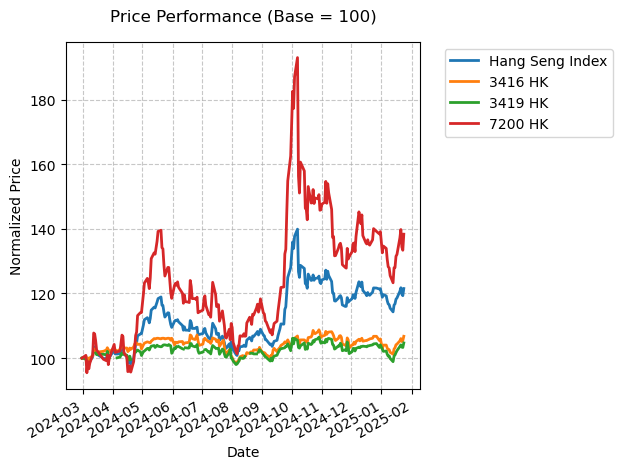

In [5]:
# Create the plot
plt.figure(figsize=(12, 6))

# Plot normalized price trends (starting at 100)
normalized_df = df[['Hang Seng Index', '3416 HK', '3419 HK', '7200 HK']].div(
    df[['Hang Seng Index', '3416 HK', '3419 HK', '7200 HK']].iloc[0]) * 100

# Plot each line
normalized_df.plot(linewidth=2)

# Customize the plot
plt.title('Price Performance (Base = 100)', fontsize=12, pad=15)
plt.ylabel('Normalized Price', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()